<center>
    
    Toy dataset with CNN
    
    Author: Daniel Coble
    
    Status: Finished
</center>

In "Toy datasets and training an MLP", I created a simple toy dataset with entries of 32x32 black and white pixel grids. Each grid had two lines, and it was the goal of the neural net to predict where the lines would intersect. One can easily see why an MLP might not be the best choice for this type of data. For one thing, the MLP has no sense of left, right, up, and down. It recieves only a flattened vector of the pixel grid, and must intuit our idea of space from the training data. (Imagine all the pixels in the dataset were randomized before being handed to you, and you didn't know how they were randomized. You would find thed task much harder.)

Convolutional neural networks do have a sense of direction. The 2D convolutional network trained here applies the same convolution (technically a cross-correlation) to every element of the 2D grid input to produce another 2D grid. With progressive layers CNNs, the grid will get smaller by the use of a stride.

10% finished.
20% finished.
30% finished.
40% finished.
50% finished.
60% finished.
70% finished.
80% finished.
90% finished.
100% finished.


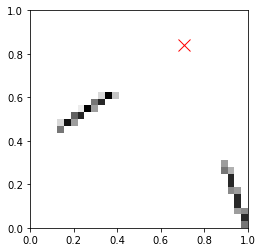

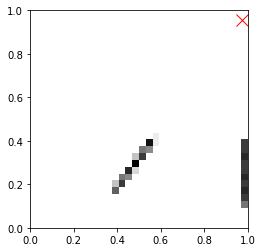

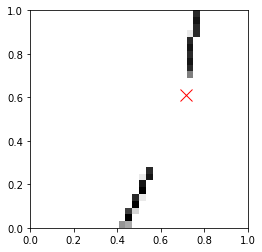

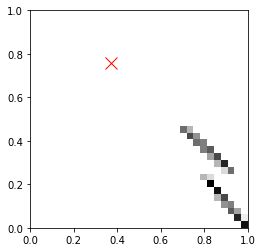

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import losses
from math import floor
from sklearn import model_selection


def createplot():
    length = .3
    length_sq = length**2
    point = [random.random(), random.random()]
    x1 = random.random()
    y1 = random.random()
    no_space_line_1 = True
    while(no_space_line_1):
        no_space_line_1 = False
        dist1 = (x1-point[0])**2 + (y1-point[1])**2
        if(dist1 < length_sq):
            no_space_line_1 = True
            x1 = random.random()
            y1 = random.random()
    x2 = random.random()
    y2 = random.random()
    no_space_line_2 = True
    while(no_space_line_2):
        no_space_line_2 = False
        dist2 = (x2-point[0])**2 + (y2-point[1])**2
        if(dist2 < length**2):
            no_space_line_2 = True
            x2 = random.random()
            y2 = random.random()
    
    dist1 = math.sqrt(dist1)
    dist2 = math.sqrt(dist2)
    lineseg_1 = np.array([[x1,y1],[x1 + length*(point[0] - x1)/dist1,y1 + length*(point[1] - y1)/dist1]])
    lineseg_2 = np.array([[x2,y2],[x2 + length*(point[0] - x2)/dist2,y2 + length*(point[1] - y2)/dist2]])
    lineseg_1 = 32*lineseg_1
    lineseg_2 = 32*lineseg_2
    delta_x = 0.01 * (lineseg_1[1,0] - lineseg_1[0,0])
    delta_y = 0.01 * (lineseg_1[1,1] - lineseg_1[0,1])
    x1 *= 32
    y1 *= 32
    
    plot = np.zeros(shape=(32,32))
    for i in range(100):
        x_index = floor(x1 + i*delta_x)
        y_index = floor(y1 + i*delta_y)
        plot[x_index, y_index] += .0678822
    
    x2 *= 32
    y2 *= 32
    delta_x = 0.01 * (lineseg_2[1,0] - lineseg_2[0,0])
    delta_y = 0.01 * (lineseg_2[1,1] - lineseg_2[0,1])
    
    for i in range(100):
        x_index = floor(x2 + i*delta_x)
        y_index = floor(y2 + i*delta_y)
        plot[x_index, y_index] += .0678822
    
    return (plot, point)
    
        

amount = 100000
data = []
for i in range(amount):
    if((i+1) % (amount//10) == 0):
        print(str(round((i+1) / amount * 100)) + "% finished.")
    data.append(createplot())
plots = np.array([data[i][0] for i in range(amount)])
points = np.array([data[i][1] for i in range(amount)])
plots = np.expand_dims(plots, -1) # convolutional NN want's a dimension for channels


train_img, test_img, train_label, test_label = model_selection.train_test_split(plots, points, test_size=.2)

for i in range(4):
    randint = random.randint(0,2000)
    true = test_label[randint] 
    plt.figure()
    plt.imshow(test_img[randint], cmap=mpl.cm.binary, interpolation = 'nearest', origin='lower', extent=[0,1,0,1])
    plt.grid(False)
    plt.plot(true[1], true[0], marker='x', markersize=12, color="red")
    plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import losses

model = keras.Sequential([
    keras.layers.Conv2D(filters=4, kernel_size=8, strides=1, padding="same", activation="relu", input_shape=(32,32,1)),
    keras.layers.Conv2D(filters=4, kernel_size=8, strides=2, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=4, kernel_size=4, strides=2, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=4, kernel_size=4, strides=2, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=4, kernel_size=2, strides=2, padding="same", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(train_img, train_label, epochs=5)

Epoch 1/5
2500/2500 [==============================] - 27s 11ms/step - loss: 0.0544 - accuracy: 0.7176
Epoch 2/5
2500/2500 [==============================] - 26s 10ms/step - loss: 0.0378 - accuracy: 0.7968
Epoch 3/5
2500/2500 [==============================] - 27s 11ms/step - loss: 0.0347 - accuracy: 0.8165
Epoch 4/5
2500/2500 [==============================] - 26s 11ms/step - loss: 0.0328 - accuracy: 0.8261
Epoch 5/5
2500/2500 [==============================] - 27s 11ms/step - loss: 0.0316 - accuracy: 0.8297


Now let's plot a few of the model's predictions on the test data to see how it did.

625/625 [==============================] - 2s 3ms/step


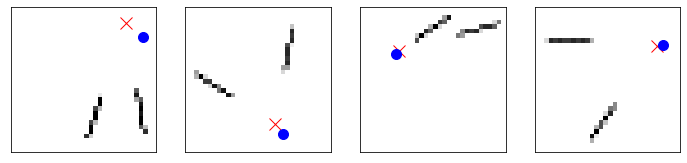

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
predictions = model.predict(test_img)

fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True)
plt.grid(False)

for i, ax in enumerate(axes):
    randint = random.randint(0,2000)
    true = test_label[randint]
    pred = predictions[randint]
    plt.figure()
    ax.imshow(test_img[randint], cmap=mpl.cm.binary, interpolation = 'nearest', origin='lower', extent=[0,1,0,1])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.plot(true[1], true[0], marker='x', markersize=12, color="red")
    ax.plot(pred[1], pred[0], marker='o', markersize=10, color="blue")
plt.savefig("CNN predictions")

Now we can find the accuracy and loss for the data against the testing set. I got a testing accuracy of 0.83 and a loss of 0.032, which is basically the exact same as the MLP's values. However, this model converged after only 5 epochs, and has much, much fewer weights (1910 vs. 34978).

In [ ]:
test_loss, test_acc = model.evaluate(test_img, test_label, verbose=0)
print('Test accuracy: ', test_acc)
print('Test loss: ', test_loss )

weight_sum = 0
for weights in model.trainable_weights:
    weight_sum += np.size(weights)
print("Amount of weights: ", weight_sum)
print("Training set size: ", train_img.shape[0])